<a href="https://colab.research.google.com/github/Atchaya-BV/Atchaya-BV/blob/main/DeSeq_Analysis_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differentially expressed gene analysis using DESeq2 tool in R

#step 1 Set up the working directory

In [1]:
getwd()

[1] "/content"

#step 2 Install the required package DESeq2

In [5]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'DESeq2'

also installing the dependencies ‘DelayedArray’, ‘SummarizedExperiment’


Old packages: 'data.table', 'processx'



#step 3 Load DESeq2

In [6]:
library("DESeq2")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



#load count data

In [7]:
Count_data = read.csv(file = "/content/Count_matrix.csv", header = T, sep = ",",row.names=1,check.names = FALSE)

In [8]:
dim(Count_data)

[1] 60660   168

In [9]:
Count_data

,TCGA-FB-AAPY-01A,TCGA-IB-A7LX-01A,TCGA-XN-A8T5-01A,TCGA-HZ-A77O-01A,TCGA-FB-AAPQ-01A,TCGA-3A-A9IL-01A,TCGA-FB-AAPS-01A,TCGA-IB-A7M4-01A,TCGA-IB-8126-01A,TCGA-FB-AAPP-01A,⋯,TCGA-FB-A78T-01A,TCGA-HZ-7919-01A,TCGA-IB-AAUP-01A,TCGA-2J-AABI-01A,TCGA-3A-A9IV-01A,TCGA-YY-A8LH-01A,TCGA-HV-A5A3-11A,TCGA-H6-A45N-11A,TCGA-YB-A89D-11A,TCGA-H6-8124-11A
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.15,1421,3291,1257,1585,553,771,1175,2007,1734,1191,⋯,1525,1777,1319,2178,158,1907,3092,369,1593,3738
ENSG00000000005.6,3,0,2,1,0,1,54,0,47,2,⋯,1,0,4,0,2,0,1,5,331,4
ENSG00000000419.13,924,1711,1195,1419,946,774,877,2374,1263,1403,⋯,1320,1915,1386,2149,1059,1558,1092,1023,1228,1532
ENSG00000000457.14,691,1164,400,539,605,464,371,479,532,609,⋯,1052,1025,750,821,310,777,610,706,348,959
ENSG00000000460.17,138,457,113,232,86,78,106,206,124,156,⋯,232,329,319,387,101,224,148,220,132,243
ENSG00000000938.13,1477,209,829,526,153,311,769,520,463,54,⋯,1949,598,1258,815,105,162,1252,5757,5016,2046
ENSG00000000971.16,7064,7662,8058,3961,3347,2221,4624,2807,8077,244,⋯,5561,6235,7102,11415,1308,1458,2837,894,5425,7427
ENSG00000001036.14,2726,2171,1509,2128,1938,1697,1806,2787,1449,1323,⋯,2793,1889,2148,1227,1418,2010,1780,799,2322,2836
ENSG00000001084.13,1107,1790,1104,649,816,968,616,3073,1227,739,⋯,1169,1593,1858,929,4282,1182,1071,2380,1172,2602


#load column data (what each column represents)

In [10]:
Col_data = read.csv(file = "/content/Column_data.csv", header = T, row.names=1,check.names = FALSE)
Col_data

,condition
,<chr>
TCGA-FB-AAPY-01A,cancer
TCGA-IB-A7LX-01A,cancer
TCGA-XN-A8T5-01A,cancer
TCGA-HZ-A77O-01A,cancer
TCGA-FB-AAPQ-01A,cancer
TCGA-3A-A9IL-01A,cancer
TCGA-FB-AAPS-01A,cancer
TCGA-IB-A7M4-01A,cancer
TCGA-IB-8126-01A,cancer


In [11]:
colnames(Count_data)

[1] "TCGA-FB-AAPY-01A" "TCGA-IB-A7LX-01A" "TCGA-XN-A8T5-01A"
  [4] "TCGA-HZ-A77O-01A" "TCGA-FB-AAPQ-01A" "TCGA-3A-A9IL-01A"
  [7] "TCGA-FB-AAPS-01A" "TCGA-IB-A7M4-01A" "TCGA-IB-8126-01A"
 [10] "TCGA-FB-AAPP-01A" "TCGA-FB-A4P6-01A" "TCGA-2J-AAB8-01A"
 [13] "TCGA-US-A774-01A" "TCGA-FB-A5VM-01A" "TCGA-2J-AABK-01A"
 [16] "TCGA-3A-A9I7-01A" "TCGA-IB-AAUU-01A" "TCGA-IB-8127-01A"
 [19] "TCGA-2J-AABO-01A" "TCGA-US-A77E-01A" "TCGA-2J-AAB9-01A"
 [22] "TCGA-H6-A45N-01A" "TCGA-LB-A7SX-01A" "TCGA-2L-AAQA-01A"
 [25] "TCGA-HZ-A4BK-01A" "TCGA-IB-AAUR-01A" "TCGA-IB-7891-01A"
 [28] "TCGA-3A-A9IU-01A" "TCGA-2L-AAQI-01A" "TCGA-3A-A9J0-01A"
 [31] "TCGA-HV-A5A3-01A" "TCGA-H8-A6C1-01A" "TCGA-2L-AAQM-01A"
 [34] "TCGA-FB-AAQ6-01A" "TCGA-IB-7647-01A" "TCGA-HZ-8315-01A"
 [37] "TCGA-HV-A5A5-01A" "TCGA-3A-A9IR-01A" "TCGA-IB-7887-01A"
 [40] "TCGA-IB-A6UF-01A" "TCGA-HZ-A49H-01A" "TCGA-S4-A8RM-01A"
 [43] "TCGA-HV-AA8V-01A" "TCGA-HZ-7289-01A" "TCGA-3A-A9IN-01A"
 [46] "TCGA-2L-AAQE-01A" "TCGA-2J-AABR-01A" "TCGA-F2-A8YN-01A"
 [49] "TCGA-IB-7651-01A" "TCGA-HV-AA8X-01A" "TCGA-LB-A9Q5-01A"
 [52] "TCGA-Z5-AAPL-01A" "TCGA-XD-AAUH-01A" "TCGA-3A-A9IC-01A"
 [55] "TCGA-XD-AAUI-01A" "TCGA-2J-AAB6-01A" "TCGA-IB-AAUN-01A"
 [58] "TCGA-3A-A9IS-01A" "TCGA-IB-AAUM-01A" "TCGA-IB-7885-01A"
 [61] "TCGA-XN-A8T3-01A" "TCGA-3A-A9IX-01A" "TCGA-HZ-8002-01A"
 [64] "TCGA-IB-7646-01A" "TCGA-2J-AAB4-01A" "TCGA-IB-7890-01A"
 [67] "TCGA-IB-7889-01A" "TCGA-FB-AAPU-01A" "TCGA-HZ-A4BH-01A"
 [70] "TCGA-2J-AABV-01A" "TCGA-FB-AAQ1-01A" "TCGA-IB-A5SQ-01A"
 [73] "TCGA-2J-AABA-01A" "TCGA-F2-A44G-01A" "TCGA-IB-AAUT-01A"
 [76] "TCGA-HZ-7918-01A" "TCGA-2J-AABT-01A" "TCGA-F2-A7TX-01A"
 [79] "TCGA-IB-AAUQ-01A" "TCGA-HZ-A77Q-01A" "TCGA-IB-7645-01A"
 [82] "TCGA-3A-A9IO-01A" "TCGA-FB-A7DR-01A" "TCGA-F2-6879-01A"
 [85] "TCGA-XD-AAUG-01A" "TCGA-3A-A9IB-01A" "TCGA-IB-AAUO-01A"
 [88] "TCGA-IB-AAUS-01A" "TCGA-HZ-8001-01A" "TCGA-IB-7886-01A"
 [91] "TCGA-HZ-A49I-01A" "TCGA-2J-AABE-01A" "TCGA-HZ-7920-01A"
 [94] "TCGA-US-A779-01A" "TCGA-HZ-7926-01A" "TCGA-HZ-8005-01A"
 [97] "TCGA-3E-AAAZ-01A" "TCGA-XD-AAUL-01A" "TCGA-HZ-8636-01A"
[100] "TCGA-HZ-A8P0-01A" "TCGA-IB-A5SO-01A" "TCGA-S4-A8RP-01A"
[103] "TCGA-HZ-7925-01A" "TCGA-3A-A9IH-01A" "TCGA-S4-A8RO-01A"
[106] "TCGA-RB-AA9M-01A" "TCGA-IB-A5SP-01A" "TCGA-OE-A75W-01A"
[109] "TCGA-IB-7888-01A" "TCGA-LB-A8F3-01A" "TCGA-HZ-A9TJ-01A"
[112] "TCGA-3A-A9IJ-01A" "TCGA-IB-AAUW-01A" "TCGA-IB-7644-01A"
[115] "TCGA-IB-A5ST-01A" "TCGA-HZ-7922-01A" "TCGA-Q3-A5QY-01A"
[118] "TCGA-Q3-AA2A-01A" "TCGA-2J-AAB1-01A" "TCGA-HV-A5A6-01A"
[121] "TCGA-IB-7654-01A" "TCGA-HZ-8003-01A" "TCGA-IB-7649-01A"
[124] "TCGA-IB-7652-01A" "TCGA-US-A77G-01A" "TCGA-3E-AAAY-01A"
[127] "TCGA-2J-AABH-01A" "TCGA-HV-A7OL-01A" "TCGA-3A-A9IZ-01A"
[130] "TCGA-YH-A8SY-01A" "TCGA-F2-7273-01A" "TCGA-IB-A5SS-01A"
[133] "TCGA-FB-AAPZ-01A" "TCGA-2J-AABP-01A" "TCGA-IB-A6UG-01A"
[136] "TCGA-F2-A44H-01A" "TCGA-HV-A7OP-01A" "TCGA-IB-7897-01A"
[139] "TCGA-IB-7893-01A" "TCGA-FB-AAQ0-01A" "TCGA-YB-A89D-01A"
[142] "TCGA-HZ-A77P-01A" "TCGA-US-A776-01A" "TCGA-2L-AAQJ-01A"
[145] "TCGA-HV-A5A4-01A" "TCGA-HZ-8637-01A" "TCGA-H6-8124-01A"
[148] "TCGA-M8-A5N4-01A" "TCGA-2L-AAQL-01A" "TCGA-PZ-A5RE-01A"
[151] "TCGA-FB-AAQ2-01A" "TCGA-FB-AAQ3-01A" "TCGA-2J-AABF-01A"
[154] "TCGA-3A-A9I5-01A" "TCGA-HZ-8317-01A" "TCGA-RB-A7B8-01A"
[157] "TCGA-HZ-A8P1-01A" "TCGA-3A-A9I9-01A" "TCGA-FB-A78T-01A"
[160] "TCGA-HZ-7919-01A" "TCGA-IB-AAUP-01A" "TCGA-2J-AABI-01A"
[163] "TCGA-3A-A9IV-01A" "TCGA-YY-A8LH-01A" "TCGA-HV-A5A3-11A"
[166] "TCGA-H6-A45N-11A" "TCGA-YB-A89D-11A" "TCGA-H6-8124-11A"

In [12]:
row.names(Col_data)

[1] "TCGA-FB-AAPY-01A" "TCGA-IB-A7LX-01A" "TCGA-XN-A8T5-01A"
  [4] "TCGA-HZ-A77O-01A" "TCGA-FB-AAPQ-01A" "TCGA-3A-A9IL-01A"
  [7] "TCGA-FB-AAPS-01A" "TCGA-IB-A7M4-01A" "TCGA-IB-8126-01A"
 [10] "TCGA-FB-AAPP-01A" "TCGA-FB-A4P6-01A" "TCGA-2J-AAB8-01A"
 [13] "TCGA-US-A774-01A" "TCGA-FB-A5VM-01A" "TCGA-2J-AABK-01A"
 [16] "TCGA-3A-A9I7-01A" "TCGA-IB-AAUU-01A" "TCGA-IB-8127-01A"
 [19] "TCGA-2J-AABO-01A" "TCGA-US-A77E-01A" "TCGA-2J-AAB9-01A"
 [22] "TCGA-H6-A45N-01A" "TCGA-LB-A7SX-01A" "TCGA-2L-AAQA-01A"
 [25] "TCGA-HZ-A4BK-01A" "TCGA-IB-AAUR-01A" "TCGA-IB-7891-01A"
 [28] "TCGA-3A-A9IU-01A" "TCGA-2L-AAQI-01A" "TCGA-3A-A9J0-01A"
 [31] "TCGA-HV-A5A3-01A" "TCGA-H8-A6C1-01A" "TCGA-2L-AAQM-01A"
 [34] "TCGA-FB-AAQ6-01A" "TCGA-IB-7647-01A" "TCGA-HZ-8315-01A"
 [37] "TCGA-HV-A5A5-01A" "TCGA-3A-A9IR-01A" "TCGA-IB-7887-01A"
 [40] "TCGA-IB-A6UF-01A" "TCGA-HZ-A49H-01A" "TCGA-S4-A8RM-01A"
 [43] "TCGA-HV-AA8V-01A" "TCGA-HZ-7289-01A" "TCGA-3A-A9IN-01A"
 [46] "TCGA-2L-AAQE-01A" "TCGA-2J-AABR-01A" "TCGA-F2-A8YN-01A"
 [49] "TCGA-IB-7651-01A" "TCGA-HV-AA8X-01A" "TCGA-LB-A9Q5-01A"
 [52] "TCGA-Z5-AAPL-01A" "TCGA-XD-AAUH-01A" "TCGA-3A-A9IC-01A"
 [55] "TCGA-XD-AAUI-01A" "TCGA-2J-AAB6-01A" "TCGA-IB-AAUN-01A"
 [58] "TCGA-3A-A9IS-01A" "TCGA-IB-AAUM-01A" "TCGA-IB-7885-01A"
 [61] "TCGA-XN-A8T3-01A" "TCGA-3A-A9IX-01A" "TCGA-HZ-8002-01A"
 [64] "TCGA-IB-7646-01A" "TCGA-2J-AAB4-01A" "TCGA-IB-7890-01A"
 [67] "TCGA-IB-7889-01A" "TCGA-FB-AAPU-01A" "TCGA-HZ-A4BH-01A"
 [70] "TCGA-2J-AABV-01A" "TCGA-FB-AAQ1-01A" "TCGA-IB-A5SQ-01A"
 [73] "TCGA-2J-AABA-01A" "TCGA-F2-A44G-01A" "TCGA-IB-AAUT-01A"
 [76] "TCGA-HZ-7918-01A" "TCGA-2J-AABT-01A" "TCGA-F2-A7TX-01A"
 [79] "TCGA-IB-AAUQ-01A" "TCGA-HZ-A77Q-01A" "TCGA-IB-7645-01A"
 [82] "TCGA-3A-A9IO-01A" "TCGA-FB-A7DR-01A" "TCGA-F2-6879-01A"
 [85] "TCGA-XD-AAUG-01A" "TCGA-3A-A9IB-01A" "TCGA-IB-AAUO-01A"
 [88] "TCGA-IB-AAUS-01A" "TCGA-HZ-8001-01A" "TCGA-IB-7886-01A"
 [91] "TCGA-HZ-A49I-01A" "TCGA-2J-AABE-01A" "TCGA-HZ-7920-01A"
 [94] "TCGA-US-A779-01A" "TCGA-HZ-7926-01A" "TCGA-HZ-8005-01A"
 [97] "TCGA-3E-AAAZ-01A" "TCGA-XD-AAUL-01A" "TCGA-HZ-8636-01A"
[100] "TCGA-HZ-A8P0-01A" "TCGA-IB-A5SO-01A" "TCGA-S4-A8RP-01A"
[103] "TCGA-HZ-7925-01A" "TCGA-3A-A9IH-01A" "TCGA-S4-A8RO-01A"
[106] "TCGA-RB-AA9M-01A" "TCGA-IB-A5SP-01A" "TCGA-OE-A75W-01A"
[109] "TCGA-IB-7888-01A" "TCGA-LB-A8F3-01A" "TCGA-HZ-A9TJ-01A"
[112] "TCGA-3A-A9IJ-01A" "TCGA-IB-AAUW-01A" "TCGA-IB-7644-01A"
[115] "TCGA-IB-A5ST-01A" "TCGA-HZ-7922-01A" "TCGA-Q3-A5QY-01A"
[118] "TCGA-Q3-AA2A-01A" "TCGA-2J-AAB1-01A" "TCGA-HV-A5A6-01A"
[121] "TCGA-IB-7654-01A" "TCGA-HZ-8003-01A" "TCGA-IB-7649-01A"
[124] "TCGA-IB-7652-01A" "TCGA-US-A77G-01A" "TCGA-3E-AAAY-01A"
[127] "TCGA-2J-AABH-01A" "TCGA-HV-A7OL-01A" "TCGA-3A-A9IZ-01A"
[130] "TCGA-YH-A8SY-01A" "TCGA-F2-7273-01A" "TCGA-IB-A5SS-01A"
[133] "TCGA-FB-AAPZ-01A" "TCGA-2J-AABP-01A" "TCGA-IB-A6UG-01A"
[136] "TCGA-F2-A44H-01A" "TCGA-HV-A7OP-01A" "TCGA-IB-7897-01A"
[139] "TCGA-IB-7893-01A" "TCGA-FB-AAQ0-01A" "TCGA-YB-A89D-01A"
[142] "TCGA-HZ-A77P-01A" "TCGA-US-A776-01A" "TCGA-2L-AAQJ-01A"
[145] "TCGA-HV-A5A4-01A" "TCGA-HZ-8637-01A" "TCGA-H6-8124-01A"
[148] "TCGA-M8-A5N4-01A" "TCGA-2L-AAQL-01A" "TCGA-PZ-A5RE-01A"
[151] "TCGA-FB-AAQ2-01A" "TCGA-FB-AAQ3-01A" "TCGA-2J-AABF-01A"
[154] "TCGA-3A-A9I5-01A" "TCGA-HZ-8317-01A" "TCGA-RB-A7B8-01A"
[157] "TCGA-HZ-A8P1-01A" "TCGA-3A-A9I9-01A" "TCGA-FB-A78T-01A"
[160] "TCGA-HZ-7919-01A" "TCGA-IB-AAUP-01A" "TCGA-2J-AABI-01A"
[163] "TCGA-3A-A9IV-01A" "TCGA-YY-A8LH-01A" "TCGA-HV-A5A3-11A"
[166] "TCGA-H6-A45N-11A" "TCGA-YB-A89D-11A" "TCGA-H6-8124-11A"

In [13]:
all(rownames(Col_data)==colnames(Count_data))

[1] TRUE

#count number of NA values in matrix

#False if NA is not present, otherwise True

In [14]:
(is.na(Count_data))

,TCGA-FB-AAPY-01A,TCGA-IB-A7LX-01A,TCGA-XN-A8T5-01A,TCGA-HZ-A77O-01A,TCGA-FB-AAPQ-01A,TCGA-3A-A9IL-01A,TCGA-FB-AAPS-01A,TCGA-IB-A7M4-01A,TCGA-IB-8126-01A,TCGA-FB-AAPP-01A,⋯,TCGA-FB-A78T-01A,TCGA-HZ-7919-01A,TCGA-IB-AAUP-01A,TCGA-2J-AABI-01A,TCGA-3A-A9IV-01A,TCGA-YY-A8LH-01A,TCGA-HV-A5A3-11A,TCGA-H6-A45N-11A,TCGA-YB-A89D-11A,TCGA-H6-8124-11A
ENSG00000000003.15,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000005.6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000419.13,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000457.14,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000460.17,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000938.13,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000971.16,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000001036.14,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000001084.13,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000001167.14,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


#count of how many NAs are present

In [15]:
sum(is.na(Count_data))

[1] 1

#to find which gene has NA value

In [16]:
which(is.na(Count_data),arr.ind=TRUE)

,row,col
ENSG00000288675.1,60660,114


#use Count_data <- na.omit(Count_data) to remove row with NA

#for (i in seq_along(Count_data)) {Count_data[[i]][is.na(Count_data[[i]])] <- mean(Count_data[[i]], na.rm = TRUE)} use this to replace NA with the mean of column

# here we're just replace NA values in matrix with zero


In [17]:
Count_data[is.na(Count_data)] <- 0

#Filteration of data (remove genes with all zero values) an optional step


In [18]:
Count_data <-Count_data[rowSums(Count_data[])>0,]

#creating deseq object

# we're testing for the different conditions (normal vs cancer)

In [19]:
dds = DESeqDataSetFromMatrix(countData = Count_data,
                             colData = Col_data,
                             design = ~condition)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [20]:
dds

class: DESeqDataSet 
dim: 56954 168 
metadata(1): version
assays(1): counts
rownames(56954): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(0):
colnames(168): TCGA-FB-AAPY-01A TCGA-IB-A7LX-01A ... TCGA-YB-A89D-11A
  TCGA-H6-8124-11A
colData names(1): condition

In [21]:
DESeq

function (object, test = c("Wald", "LRT"), fitType = c("parametric", 
    "local", "mean", "glmGamPoi"), sfType = c("ratio", "poscounts", 
    "iterate"), betaPrior, full = design(object), reduced, quiet = FALSE, 
    minReplicatesForReplace = 7, modelMatrixType, useT = FALSE, 
    minmu = if (fitType == "glmGamPoi") 1e-06 else 0.5, parallel = FALSE, 
    BPPARAM = bpparam()) 
{
    stopifnot(is(object, "DESeqDataSet"))
    test <- match.arg(test, choices = c("Wald", "LRT"))
    fitType <- match.arg(fitType, choices = c("parametric", "local", 
        "mean", "glmGamPoi"))
    dispersionEstimator <- if (fitType == "glmGamPoi") {
        "glmGamPoi"
    }
    else {
        "DESeq2"
    }
    if (fitType == "glmGamPoi") {
        minReplicatesForReplace <- Inf
        if (parallel) {
            warning("parallelization of DESeq() is not implemented for fitType='glmGamPoi'")
        }
    }
    sfType <- match.arg(sfType, choices = c("ratio", "poscounts", 
        "iterate"))
    stopifnot(is.logical(quiet))
    stopifnot(is.numeric(minReplicatesForReplace))
    stopifnot(is.logical(parallel))
    modelAsFormula <- !is.matrix(full) & is(design(object), "formula")
    if (missing(betaPrior)) {
        betaPrior <- FALSE
    }
    else {
        stopifnot(is.logical(betaPrior))
    }
    object <- sanitizeRowRanges(object)
    if (test == "LRT") {
        if (missing(reduced)) {
            stop("likelihood ratio test requires a 'reduced' design, see ?DESeq")
        }
        if (betaPrior) {
            stop("test='LRT' does not support use of LFC shrinkage, use betaPrior=FALSE")
        }
        if (!missing(modelMatrixType) && modelMatrixType == "expanded") {
            stop("test='LRT' does not support use of expanded model matrix")
        }
        if (is.matrix(full) | is.matrix(reduced)) {
            if (!(is.matrix(full) & is.matrix(reduced))) {
                stop("if one of 'full' and 'reduced' is a matrix, the other must be also a matrix")
            }
        }
        if (modelAsFormula) {
            checkLRT(full, reduced)
        }
        else {
            checkFullRank(full)
            checkFullRank(reduced)
            if (ncol(full) <= ncol(reduced)) {
                stop("the number of columns of 'full' should be more than the number of columns of 'reduced'")
            }
        }
    }
    if (test == "Wald" & !missing(reduced)) {
        stop("'reduced' ignored when test='Wald'")
    }
    if (dispersionEstimator == "glmGamPoi" && test == "Wald") {
        warning("glmGamPoi dispersion estimator should be used in combination with a LRT and not a Wald test.", 
            call. = FALSE)
    }
    if (fitType != "glmGamPoi") {
        if (!is.integer(counts(object))) {
            stop("the count data is not in integer mode and fitType is not 'glmGamPoi'")
        }
    }
    if (modelAsFormula) {
        designAndArgChecker(object, betaPrior)
        if (design(object) == formula(~1)) {
            warning("the design is ~ 1 (just an intercept). is this intended?")
        }
        if (full != design(object)) {
            stop("'full' specified as formula should equal design(object)")
        }
        modelMatrix <- NULL
    }
    else {
        if (!quiet) 
            message("using supplied model matrix")
        if (betaPrior == TRUE) {
            stop("betaPrior=TRUE is not supported for user-provided model matrices")
        }
        checkFullRank(full)
        modelMatrix <- full
    }
    attr(object, "betaPrior") <- betaPrior
    stopifnot(length(parallel) == 1 & is.logical(parallel))
    if (!is.null(sizeFactors(object)) || !is.null(normalizationFactors(object))) {
        if (!quiet) {
            if (!is.null(normalizationFactors(object))) {
                message("using pre-existing normalization factors")
            }
            else {
                message("using pre-existing size factors")
            }
        }
    }
    else {
        if (!quiet) 
            message(

#check the factor level before setting the factor level

In [22]:
dds$condition

[1] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [11] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [21] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [31] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [41] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [51] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [61] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [71] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [81] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
 [91] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
[101] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
[111] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
[121] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
[131] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
[141] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
[151] cancer cancer cancer cancer cancer cancer cancer cancer cancer cancer
[161] cancer cancer cancer cancer normal normal normal normal
Levels: cancer normal

#set the factor level

In [23]:
dds$condition <- relevel(dds$condition, ref = "normal")

#filtration (optional step)

#filter those rows with atleast 10 reads in total

In [24]:
filtered_count <- rowSums(counts(dds)) >=10

In [25]:
dds <- dds[filtered_count,]

# Run DESeq

In [26]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 9198 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [27]:
res1 <- results(dds)

In [28]:
summary(res1)


out of 48834 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 557, 1.1%
LFC < 0 (down)     : 462, 0.95%
outliers [1]       : 952, 1.9%
low counts [2]     : 20170, 41%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [29]:
res1

log2 fold change (MLE): condition cancer vs normal 
Wald test p-value: condition cancer vs normal 
DataFrame with 49302 rows and 6 columns
                     baseMean log2FoldChange     lfcSE       stat    pvalue
                    <numeric>      <numeric> <numeric>  <numeric> <numeric>
ENSG00000000003.15  1742.3701      -0.205590  0.384022  -0.535359  0.592401
ENSG00000000005.6     12.8084      -2.990985  1.424111  -2.100247        NA
ENSG00000000419.13  1405.9788       0.281960  0.193339   1.458370  0.144739
ENSG00000000457.14   704.7464       0.195766  0.236442   0.827965  0.407690
ENSG00000000460.17   216.2253       0.294579  0.280651   1.049629  0.293889
...                       ...            ...       ...        ...       ...
ENSG00000288667.1    0.192568      -0.220166  2.412688 -0.0912536 0.9272911
ENSG00000288669.1    0.152611       0.484468  2.510646  0.1929655 0.8469860
ENSG00000288670.1  217.123643       0.602808  0.301854  1.9970173 0.0458233
ENSG00000288674.1    5.73

#contrast argument

#for multiple group comparsion (when you have more than 2 condition)
#results(dds, contrast = ("normal",  "condition1", "condition2"))


In [30]:
resultsNames(dds)

[1] "Intercept"                  "condition_cancer_vs_normal"

#keeping only significant results, padj<0.05 and log2FoldChange >1

#you can change cut off according to your study plan (1.5 or 2 in most cases)

In [31]:
resSigUp <- subset(res1, padj < 0.05 & log2FoldChange >1)

#you can change cut off according to your study plan

In [32]:
resSigDown <- subset(res1, padj < 0.05 & log2FoldChange < 1)

#write files separately for upregulated and downregulated genes

In [33]:
write.csv(resSigUp, "Upregulated_genes.csv")

In [34]:
write.csv(resSigDown, "Downregulated_genes.csv")

# Upregulated genes and Downregulated genes in one file with padj<0.05

In [35]:
resSig <- subset(res1, log2FoldChange >1 & padj <0.05 | log2FoldChange < -1 & padj < 0.05)

In [36]:
write.csv(resSig, "All_Diff_exp.csv")

#Visualization

#1. MA PLOT

M (log Mean) vs A (log Average) plot

**Purpose**:

MA plots are used in gene expression analysis to visualize differences between two conditions (in our case it's normal vs cancer) by plotting the log fold change (M) against the average expression (A).

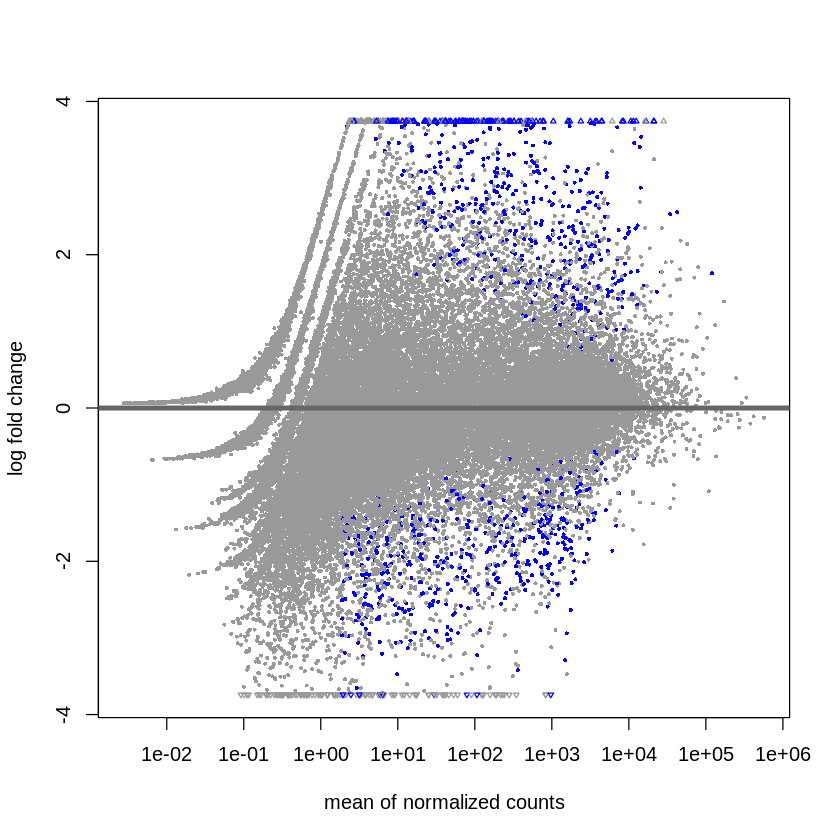

In [37]:
plotMA(res1)

**Interpretation**:

The **x-axis** (A) represents the mean
expression level (log scale).

The **y-axis** (M) represents the log2 fold change (log2FC) between conditions.

Helps **detect** systematic biases and expression **variations**.

Points around **zero** indicate **no change**, while **deviations** indicate **upregulated** or **downregulated** genes.

#2. Volcano plot

**Purpose**:

Used in differential gene expression analysis to **highlight genes** with both statistical significance and large fold changes.

#install the package EnhancedVolcano

In [38]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("EnhancedVolcano")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'EnhancedVolcano'

also installing the dependency ‘ggrepel’


Old packages: 'data.table', 'processx'



#load the library EnhancedVolcano

In [39]:
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



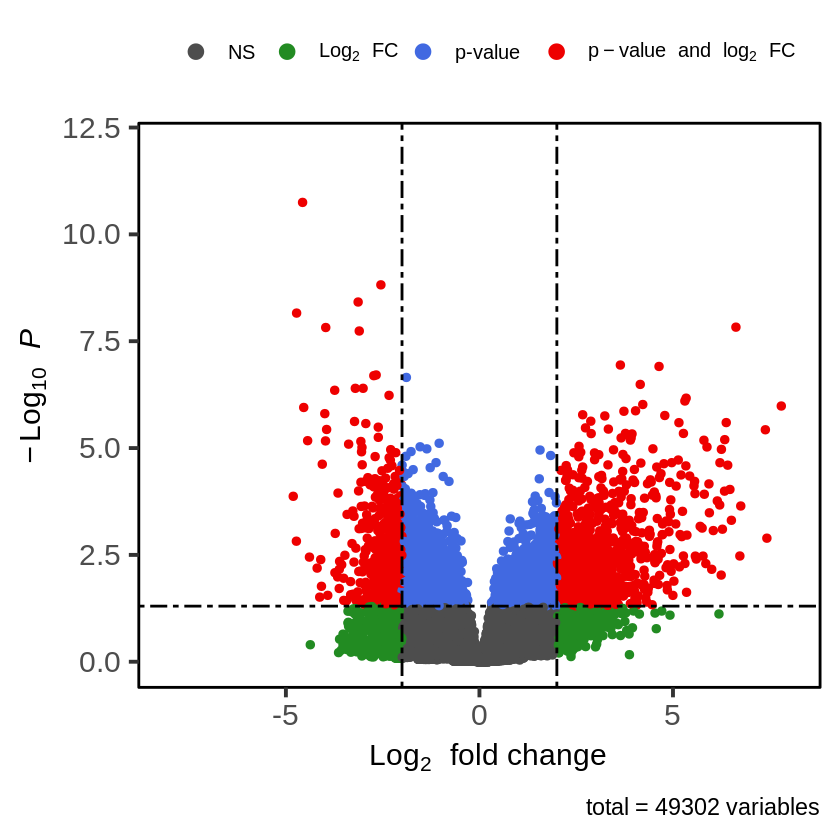

In [40]:
EnhancedVolcano(res1,
                lab = "",
                x = 'log2FoldChange',
                y = 'pvalue',
                selectLab = "NULL",
                title = NULL,
                cutoffLineType = 'twodash',
                cutoffLineWidth = 0.8,
                xlim = c(-8,8),
                xlab = bquote(~Log[2]~ 'fold change'),
                ylim = c(0,12),
                ylab = bquote(~-Log[10]~italic(P)),
                pCutoff = 0.05,
                FCcutoff = 2.0,
                #transcriptPointSize = 0.5,
                #transcriptLabSize = 4.0,
                colAlpha = 1,
                shape = 19,
                subtitle = NULL,
                legendPosition = 'top',
                legendLabSize = 12,
                legendIconSize = 4.0,
                gridlines.major = FALSE,
                gridlines.minor = FALSE,
                drawConnectors = FALSE,
                widthConnectors = 0.2,
                colConnectors = 'grey50',
                border = 'full' )

**Interpretation**:

The **x-axis** represents log2 fold change (**log2FC**).

The **y-axis** represents -log10(**p-value**) (statistical significance).

Genes significantly **upregulated** appear on the **right**.

Genes significantly **downregulated** appear on the **left**.

**Highly significant** genes (low p-values) appear at the **top**.

It helps in selecting biologically relevant genes for further study.

#normalizing the gene expression data

In [41]:
norm_counts <- counts(dds, normalized = TRUE) #normalized data

In [42]:
head(norm_counts)

,TCGA-FB-AAPY-01A,TCGA-IB-A7LX-01A,TCGA-XN-A8T5-01A,TCGA-HZ-A77O-01A,TCGA-FB-AAPQ-01A,TCGA-3A-A9IL-01A,TCGA-FB-AAPS-01A,TCGA-IB-A7M4-01A,TCGA-IB-8126-01A,TCGA-FB-AAPP-01A,⋯,TCGA-FB-A78T-01A,TCGA-HZ-7919-01A,TCGA-IB-AAUP-01A,TCGA-2J-AABI-01A,TCGA-3A-A9IV-01A,TCGA-YY-A8LH-01A,TCGA-HV-A5A3-11A,TCGA-H6-A45N-11A,TCGA-YB-A89D-11A,TCGA-H6-8124-11A
ENSG00000000003.15,1461.201455,2959.6249,1432.551062,1819.118350,1113.3305,774.591947,1488.72121,2095.6024,2077.58619,1865.248026,⋯,1226.0350110,1388.8903,1057.359357,1602.9926,192.329878,1695.2504,3325.171885,406.607576,1637.2640,2637.942801
ENSG00000000005.6,3.084873,0.0000,2.279318,1.147709,0.0000,1.004659,68.41783,0.0000,56.31289,3.132238,⋯,0.8039574,0.0000,3.206548,0.0000,2.434555,0.0000,1.075411,5.509588,340.1974,2.822839
ENSG00000000419.13,950.140848,1538.7172,1361.892219,1628.598700,1904.5401,777.605923,1111.15617,2478.8042,1513.25914,2197.265306,⋯,1061.2237472,1496.7501,1111.069044,1581.6488,1289.097092,1385.0027,1174.349191,1127.261654,1262.1219,1081.147237
ENSG00000000457.14,710.549054,1046.7953,455.863504,618.615010,1218.0198,466.161690,470.05580,500.1463,637.41399,953.766623,⋯,845.7631683,801.1326,601.227838,604.2502,377.356089,690.7234,656.000922,777.953791,357.6697,676.775588
ENSG00000000460.17,141.904153,410.9841,128.781440,266.268427,173.1400,78.363388,134.30166,215.0942,148.57018,244.314603,⋯,186.5181132,257.1440,255.722240,284.8293,122.945048,199.1275,159.160879,242.421861,135.6678,171.487453
ENSG00000000938.13,1518.785749,187.9555,944.777112,603.694796,308.0282,312.448892,974.32052,542.9563,554.74187,84.570439,⋯,1566.9129420,467.3925,1008.459493,599.8342,127.814159,144.0118,1346.415006,6343.739337,5155.3774,1443.882015


#how to add name of genes in selectlab add gene id. Use when you want to highlight particular genes on the plot

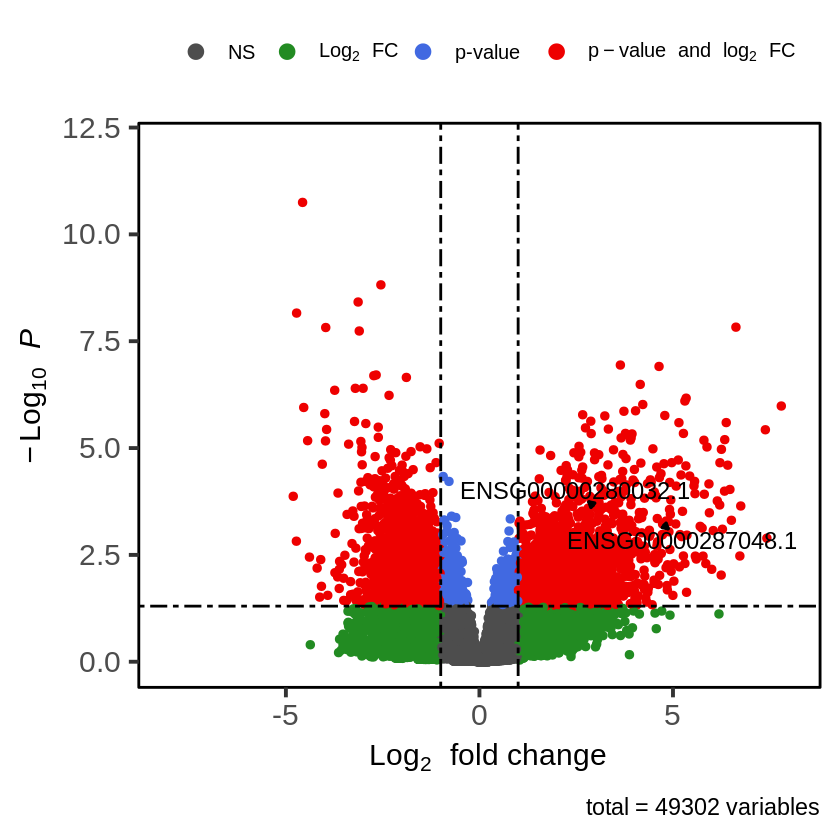

In [43]:
EnhancedVolcano(res1,
                lab = rownames(res1),
                x = 'log2FoldChange',
                y = 'pvalue',
                selectLab = c('ENSG00000287048.1','ENSG00000280032.1'),
                title = NULL,
                cutoffLineType = 'twodash',
                cutoffLineWidth = 0.8,
                xlim = c(-8,8),
                xlab = bquote(~Log[2]~ 'fold change'),
                ylim = c(0,12),
                ylab = bquote(~-Log[10]~italic(P)),
                pCutoff = 0.05,
                FCcutoff = 1.0,
                colAlpha = 1,
                shape = 19,
                subtitle = NULL,
                legendPosition = 'top',
                legendLabSize = 12,
                legendIconSize = 4.0,
                gridlines.major = FALSE,
                gridlines.minor = FALSE,
                drawConnectors = TRUE,
                widthConnectors = 1.0,
                colConnectors = 'black',
                border = 'full' )

# To view the Log2FC and pvalue of upregulated genes

In [49]:
upreg <- read.csv("/content/Upregulated_genes.csv")
upreg_analysis <- upreg[, c("X", "log2FoldChange", "pvalue")]

In [50]:
head(upreg_analysis, 10)

,X,log2FoldChange,pvalue
,<chr>,<dbl>,<dbl>
1,ENSG00000005073.6,4.131807,3.218394e-04
2,ENSG00000006555.11,1.371491,1.798511e-04
3,ENSG00000006611.17,1.936023,4.827733e-04
4,ENSG00000011426.11,2.135292,2.992366e-04
5,ENSG00000016490.16,6.750836,2.268801e-04
6,ENSG00000019102.12,2.810942,2.545138e-04
7,ENSG00000043355.12,8.040983,5.874235e-08
8,ENSG00000053747.17,2.381339,1.430222e-04
9,ENSG00000060140.9,2.739854,3.373649e-06


# To view the Log2FC and pvalue of downregulated genes

In [51]:
downreg <- read.csv("/content/Downregulated_genes.csv")
downreg_analysis <- downreg[, c("X", "log2FoldChange", "pvalue")]

In [52]:
head(downreg_analysis,10)

,X,log2FoldChange,pvalue
,<chr>,<dbl>,<dbl>
1,ENSG00000000938.13,-2.0899540,5.735339e-05
2,ENSG00000005844.19,-2.3744408,1.835468e-04
3,ENSG00000007129.18,-1.9545327,2.211128e-04
4,ENSG00000007264.15,-2.0536054,1.608479e-04
5,ENSG00000010327.10,-1.4656701,5.293770e-04
6,ENSG00000010671.16,-2.1825586,3.095033e-04
7,ENSG00000015285.11,-1.8511275,4.776875e-04
8,ENSG00000028277.21,-2.2554336,2.085746e-04
9,ENSG00000073861.3,-2.9354117,2.673012e-06
